In [1]:
# VIZUALIZATION OF BEST PARAMETERS
import queue
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


# Crossover Rate VS Mutation Rate

+----+----------------+-----------------+--------------------+
|    |   MutationRate |   CrossoverRate |   SolutionCostMean |
|----+----------------+-----------------+--------------------|
|  0 |           0.05 |             0.6 |              692.4 |
|  1 |           0.05 |             0.7 |              692.6 |
|  2 |           0.05 |             0.8 |              698.6 |
|  3 |           0.1  |             0.6 |              702.2 |
|  4 |           0.1  |             0.7 |              707   |
|  5 |           0.1  |             0.8 |              714   |
|  6 |           0.15 |             0.6 |              701   |
|  7 |           0.15 |             0.7 |              704.4 |
|  8 |           0.15 |             0.8 |              707   |
+----+----------------+-----------------+--------------------+


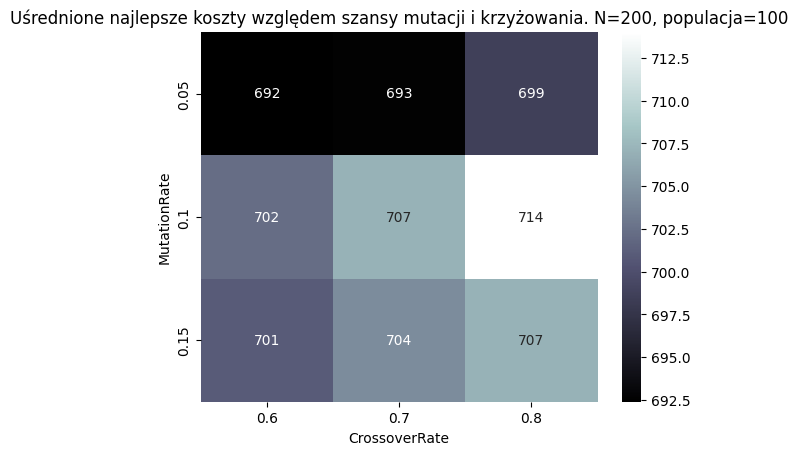

In [2]:
df = pd.read_csv('results/test_params.csv')

df_grouped = df.groupby(['MutationRate', 'CrossoverRate']).agg(
    SolutionCostMean=('SolutionCost', 'mean'),
).reset_index()

heatmap_data = df_grouped.pivot_table(
    index='MutationRate', 
    columns='CrossoverRate', 
    values='SolutionCostMean',
)

sns.heatmap(heatmap_data, 
            annot=True, 
            cmap='bone',
            fmt='.0f')

print(tabulate(df_grouped, headers='keys', tablefmt='psql'))

plt.title('Uśrednione najlepsze koszty względem szansy mutacji i krzyżowania. N=200, populacja=100')
plt.show()

# CROSSOVER METHODS

+----+-----+-------------------+--------------------+-------------------+
|    |   N | CrossoverMethod   |   SolutionCostMean |   SolutionCostStd |
|----+-----+-------------------+--------------------+-------------------|
|  0 |  50 | SinglePoint       |              227   |           12.227  |
|  1 |  50 | TwoPoint          |              207.4 |           25.6963 |
|  2 | 100 | SinglePoint       |              393   |           34.8784 |
|  3 | 100 | TwoPoint          |              403.4 |           30.2374 |
|  4 | 150 | SinglePoint       |              567.4 |           27.8711 |
|  5 | 150 | TwoPoint          |              566.2 |           21.4406 |
|  6 | 200 | SinglePoint       |              707.6 |           32.6925 |
|  7 | 200 | TwoPoint          |              729.4 |           16.8167 |
|  8 | 250 | SinglePoint       |              860.2 |           30.4007 |
|  9 | 250 | TwoPoint          |              877.8 |           39.7454 |
| 10 | 300 | SinglePoint       |      

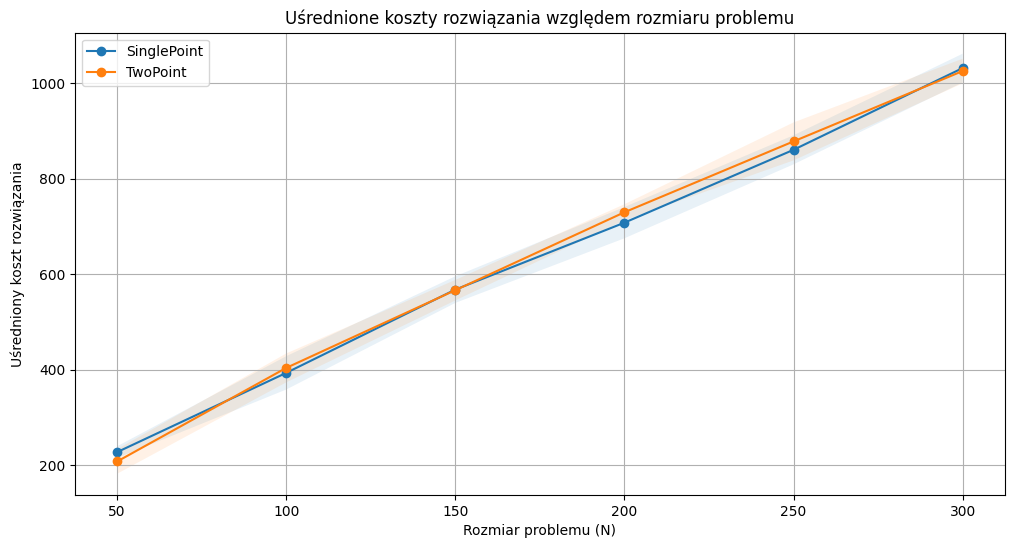

In [3]:
df = pd.read_csv('results/test_crossover.csv')
df_grouped = df.groupby(['N', 'CrossoverMethod']).agg(
    SolutionCostMean=('SolutionCost', 'mean'),
    SolutionCostStd=('SolutionCost', 'std'),
).reset_index()

X = df_grouped['N'].unique()
labels = df_grouped['CrossoverMethod'].unique()

plt.figure(figsize=(12, 6))

#scatter plot with line
for label in labels:
    y = df_grouped[df_grouped['CrossoverMethod'] == label]['SolutionCostMean']
    plt.plot(X, y, marker='o', label=label)
    
    #std
    std = df_grouped[df_grouped['CrossoverMethod'] == label]['SolutionCostStd']
    plt.fill_between(X, y - std, y + std, alpha=0.1)
plt.xticks(X)
    
plt.xlabel('Rozmiar problemu (N)')
plt.ylabel('Uśredniony koszt rozwiązania')
plt.title('Uśrednione koszty rozwiązania względem rozmiaru problemu')
plt.legend()
plt.grid(True)


#print table
print(tabulate(df_grouped, headers='keys', tablefmt='psql'))


plt.show()

# SELECTION METHODS

+----+-----+-------------------+--------------------+-------------------+
|    |   N | SelectionMethod   |   SolutionCostMean |   SolutionCostStd |
|----+-----+-------------------+--------------------+-------------------|
|  0 |  50 | Roulette          |              197.6 |           8.79204 |
|  1 |  50 | Tournament        |              208.2 |          11.0091  |
|  2 | 100 | Roulette          |              384.8 |          11.1221  |
|  3 | 100 | Tournament        |              396.8 |          33.9293  |
|  4 | 150 | Roulette          |              557.2 |          34.3613  |
|  5 | 150 | Tournament        |              573.8 |          21.3002  |
|  6 | 200 | Roulette          |              734.8 |          13.2552  |
|  7 | 200 | Tournament        |              761.2 |          18.593   |
|  8 | 250 | Roulette          |              878   |          18       |
|  9 | 250 | Tournament        |              961.2 |          39.1944  |
| 10 | 300 | Roulette          |      

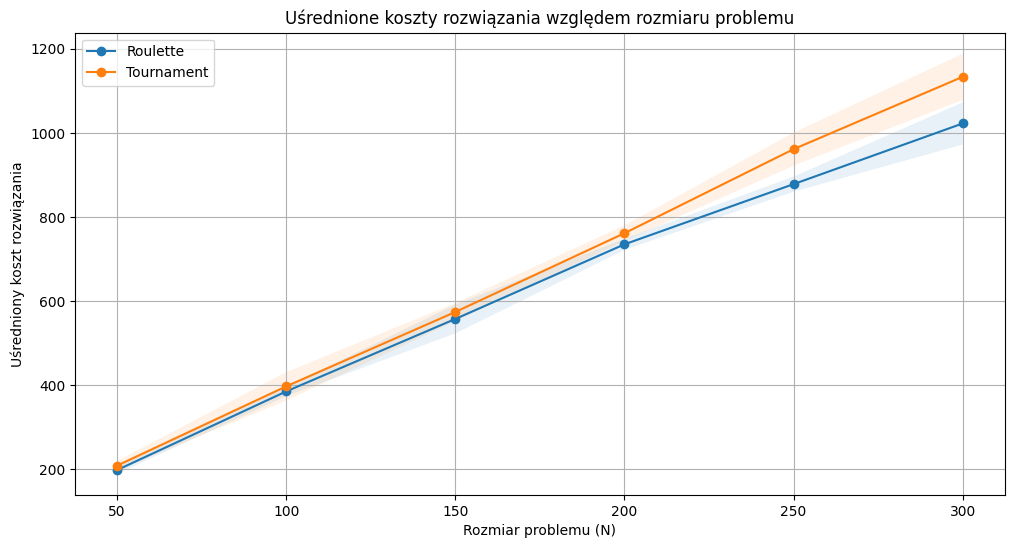

In [4]:
df = pd.read_csv('results/test_selection.csv')
df_grouped = df.groupby(['N', 'SelectionMethod']).agg(
    SolutionCostMean=('SolutionCost', 'mean'),
    SolutionCostStd=('SolutionCost', 'std'),
).reset_index()

X = df_grouped['N'].unique()
labels = df_grouped['SelectionMethod'].unique()

plt.figure(figsize=(12, 6))

#scatter plot with line
for label in labels:
    y = df_grouped[df_grouped['SelectionMethod'] == label]['SolutionCostMean']
    plt.plot(X, y, marker='o', label=label)
    
    #std
    std = df_grouped[df_grouped['SelectionMethod'] == label]['SolutionCostStd']
    plt.fill_between(X, y - std, y + std, alpha=0.1)
plt.xticks(X)
    
plt.xlabel('Rozmiar problemu (N)')
plt.ylabel('Uśredniony koszt rozwiązania')
plt.title('Uśrednione koszty rozwiązania względem rozmiaru problemu')
plt.legend()
plt.grid(True)

print(tabulate(df_grouped, headers='keys', tablefmt='psql'))


plt.show()